# Data Cleaning :

### Importing Data and Dependencies

In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
from scipy import stats
from scipy.stats import norm, skew

#Data 
train = pd.read_csv('Original_DataSet/train.csv')

#Getting Info on the Data
#with open('Original_DataSet/data_description.txt') as fhandle:
    #for line in fhandle.readlines():
        #print(line)
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Finding and Removing Outliers

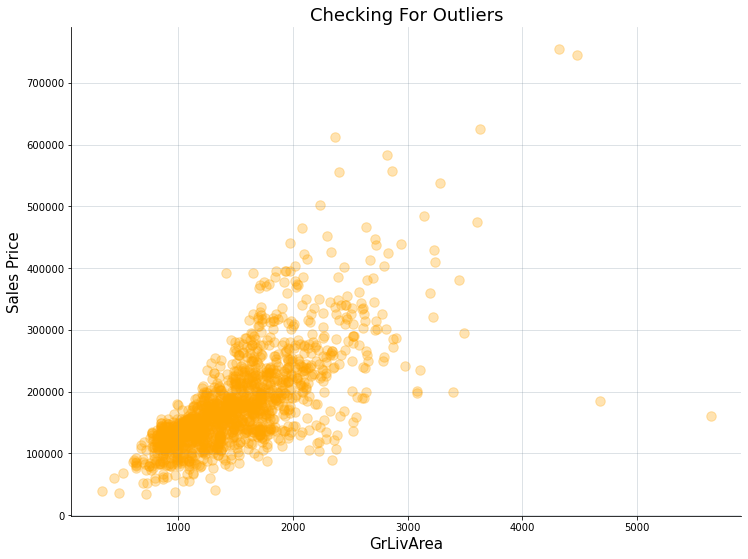

In [2]:
# Visualizing Outliers

plt.figure(figsize=(12,9))
plt.scatter(train.GrLivArea,train.SalePrice,c='orange',s=90,alpha=0.3)
plt.ylabel('Sales Price',fontsize=15)
plt.xlabel('GrLivArea',fontsize=15)
plt.title('Checking For Outliers',fontsize=18)
plt.grid( alpha=0.3,color='lightslategrey')
sp = plt.gca().spines
sp['top'].set_visible(False)
sp['right'].set_visible(False)
plt.savefig('Visualizations/Checking_Outliers.png',bbox_inches='tight');

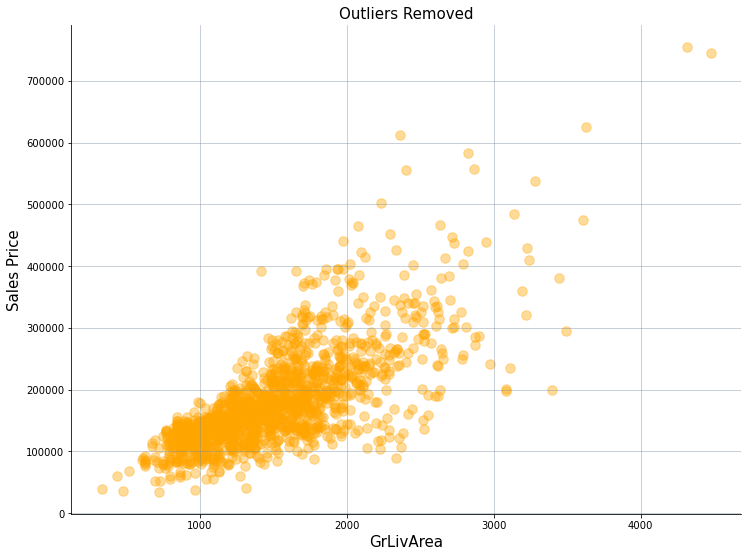

In [3]:
# Removing Outliers
train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<200000)].index,inplace=True)

# Visualizing Outliers
plt.figure(figsize=(12,9))
plt.scatter(train.GrLivArea,train.SalePrice,c='orange',s=90,alpha=0.4)
plt.ylabel('Sales Price',fontsize=15)
plt.xlabel('GrLivArea',fontsize=15)
plt.title('Outliers Removed',fontsize=15)
plt.grid( alpha=0.5,color='lightslategrey')
sp = plt.gca().spines
sp['top'].set_visible(False)
sp['right'].set_visible(False)
plt.savefig('Visualizations/Removed_Outliers.png',bbox_inches='tight')

In [4]:
# We Removed the two potential outliers from are pipeline but still, we need to make our model robust to outliers

## Checking the Target Variable 'SalePrice'

In [5]:
# Checking skew
print('The Target Variable has skew = {:.3f}'.format(skew(train.SalePrice)))

The Target Variable has skew = 1.879


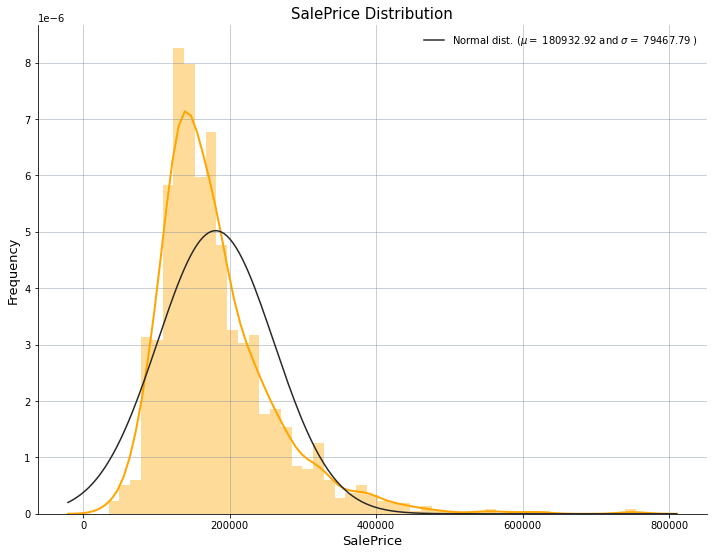

In [6]:
# Checking Distribution
plt.figure(figsize=(12,9))
sns.distplot(train['SalePrice'] , fit=norm, ax = plt.gca(),color='orange',kde_kws=dict(linewidth=2))
    
mu,sigma = norm.fit(train['SalePrice']) # Getting Fitting Parameters
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best',frameon=False)
    
sp = plt.gca().spines
sp['top'].set_visible(False)
sp['right'].set_visible(False)
plt.grid( alpha=0.5,color='lightslategrey')
    
plt.ylabel('Frequency',fontsize=13)
plt.xlabel('SalePrice',fontsize=13)
plt.title('SalePrice Distribution',fontsize=15);

### SalePrice is Skewed Positively, Therefore Normalizing the Distribution

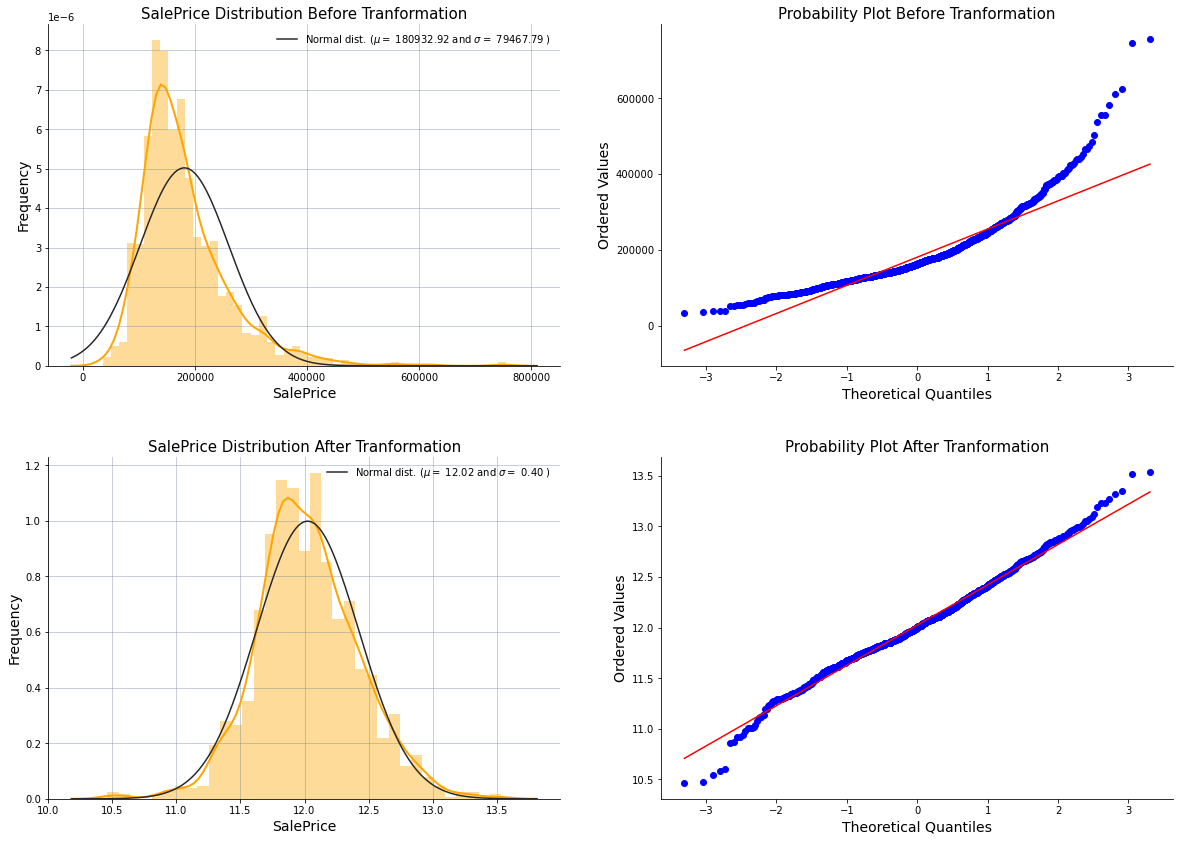

In [7]:
#Making Canvas
canv,axs = plt.subplots(2,2)
canv.set_size_inches(18,13)
canv.tight_layout(pad=7.0)
title = 'Before'

#Plotting and Tranforming

for rw in range(2):
    plt.sca(axs[rw][0])
    sns.distplot(train['SalePrice'] , fit=norm, ax = plt.gca(),color='orange',kde_kws=dict(linewidth=2))
    
    mu,sigma = norm.fit(train['SalePrice']) # Getting Fitting Parameters
    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc=1,frameon=False)
    
    sp = plt.gca().spines
    sp['top'].set_visible(False)
    sp['right'].set_visible(False)
    plt.grid( alpha=0.5,color='lightslategrey')
    
    plt.ylabel('Frequency',fontsize=14)
    plt.xlabel('SalePrice',fontsize=14)
    plt.title('SalePrice Distribution {} Tranformation'.format(title),fontsize=15,pad=5)
    
    plt.sca(axs[rw][1])
    
    stats.probplot(train['SalePrice'], plot=plt)
    plt.title('Probability Plot {} Tranformation'.format(title),fontsize=15,pad=5)
    sp = plt.gca().spines
    sp['top'].set_visible(False)
    sp['right'].set_visible(False)
    plt.ylabel('Ordered Values',fontsize=14)
    plt.xlabel('Theoretical Quantiles',fontsize=14)
    
    if rw != 0: # Little bit of automation is not bad right!
        break
    
    train["SalePrice"] = np.log1p(train["SalePrice"])
    title = 'After'

#Saving Visualization
plt.savefig('Visualizations/TargetValue_Skew.png',bbox_inches='tight')

In [8]:
# Checking skew again
print('The Target Variable has skew = {:.3f}'.format(skew(train.SalePrice)))

The Target Variable has skew = 0.121


In [9]:
# Any Skew Value < 0.75 is acceptable

## Handling Missing Data

In [10]:
#Finding Which Columns need works
train_na = (train.isnull().sum() / len(train)) * 100
train_na = train_na.drop(train_na[train_na==0].index).sort_values(ascending=False)

train_na_df = pd.DataFrame({'Missing Ratio' :train_na})
train_na_df

,Missing Ratio
PoolQC,99.588477
MiscFeature,96.296296
Alley,93.758573
Fence,80.727023
FireplaceQu,47.325103
LotFrontage,17.764060
GarageYrBlt,5.555556
GarageType,5.555556
GarageFinish,5.555556
GarageQual,5.555556


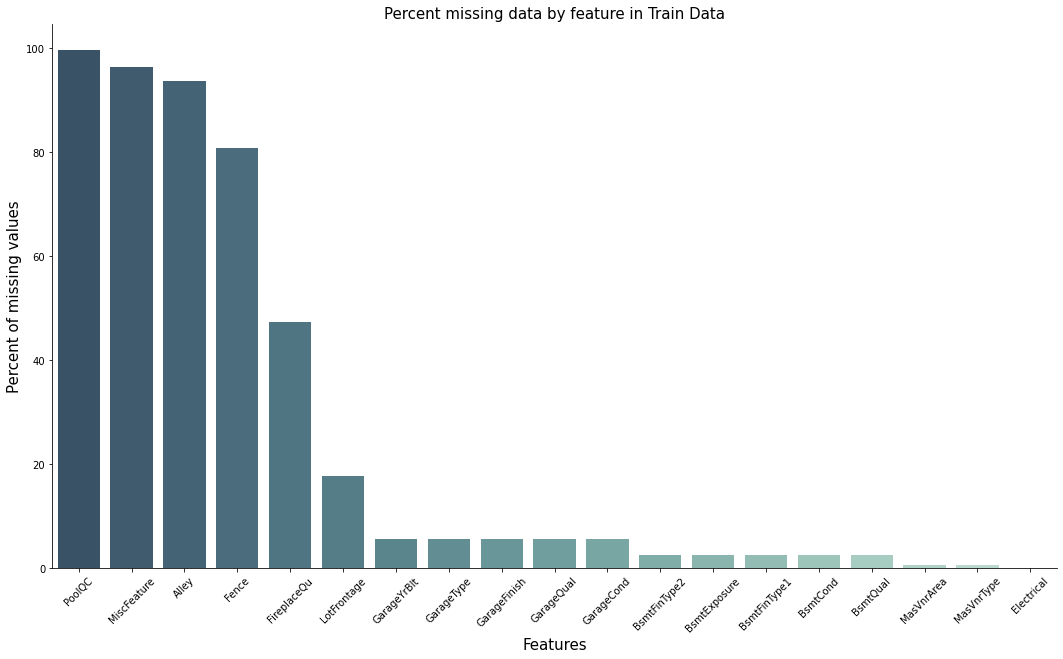

In [11]:
# Visualizing DataFrame
plt.figure(figsize=(18, 10))
sns.barplot(x=train_na.index, y=train_na,palette=sns.cubehelix_palette(19, start=-0.05,dark=0.3, rot=-.3,reverse=True))
plt.xticks(rotation='45')  
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature in Train Data', fontsize=15)
    
sp = plt.gca().spines
sp['top'].set_visible(False)
sp['right'].set_visible(False)
plt.savefig('Visualizations/MissingData_Percentage.png',bbox_inches='tight')

## Going Through Columns to fill missing values

- **PoolQC :** data description says NA mean 'No Pool'

In [12]:
train['PoolQC'] = train['PoolQC'].fillna('None')

- **MiscFeature :** data description says NA means 'No Misc Feature'

In [13]:
train["MiscFeature"] = train["MiscFeature"].fillna("None")

- **Alley :** data description says NA means 'No Alley Access'

In [14]:
train["Alley"] = train["Alley"].fillna("None")

- **Fence :** data description says NA means 'No Fence'

In [15]:
train["Fence"] = train["Fence"].fillna("None")

- **FireplaceQu :** data description says NA means 'No Fireplace'

In [16]:
train["FireplaceQu"] = train["FireplaceQu"].fillna("None")

- **LotFrontage :** we will fill in missing values by the median LotFrontage of the neighborhood.

In [17]:
mapper = train.groupby("Neighborhood").median()['LotFrontage'].to_dict()

for k,v in mapper.items():
    train.loc[(train['LotFrontage'].isnull() == True) & (train['Neighborhood'] == k), 'LotFrontage'] = v

- **GarageType, GarageFinish, GarageQual and GarageCond :** Replacing missing data with 'None'

In [18]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    train[col] = train[col].fillna('None')

- **GarageYrBlt, GarageArea and GarageCars :** Replacing missing data with 0

In [19]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    train[col] = train[col].fillna(0)

- **BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath :** missing values to '0'

In [20]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    train[col] = train[col].fillna(0)

- **BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 :** NaN to 'None'

In [21]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    train[col] = train[col].fillna('None')

- **MasVnrArea and MasVnrType :** We can fill 0 for the area and None for the type

In [22]:
#MasVnrType
train["MasVnrType"] = train["MasVnrType"].fillna("None")

#MasVnrArea
train["MasVnrArea"] = train["MasVnrArea"].fillna(0)

- **Electrical :** Since this feature has mostly 'SBrkr', we can set that for the missing value.

In [23]:
train['Electrical'] = train['Electrical'].fillna(train['Electrical'].mode()[0])

### Checking for missing values again

In [24]:
#Finding Which Columns need works
train_na = (train.isnull().sum() / len(train)) * 100
train_na = train_na.drop(train_na[train_na==0].index).sort_values(ascending=False)

train_na_df = pd.DataFrame({'Missing Ratio' :train_na})
train_na_df

,Missing Ratio


In [25]:
# there is no longer any NaN Values in this DataSet

## Saving Cleaned Data

In [26]:
display(train.head(10))
train.to_csv('Processed_DataSet/Cleaned_train_data.csv',index=False)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,12.247699
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,12.109016
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,12.317171
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,11.849405
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,12.429220
5,6,50,RL,85.0,14115,Pave,None,IR1,Lvl,AllPub,...,0,None,MnPrv,Shed,700,10,2009,WD,Normal,11.870607
6,7,20,RL,75.0,10084,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,8,2007,WD,Normal,12.634606
7,8,60,RL,80.0,10382,Pave,None,IR1,Lvl,AllPub,...,0,None,None,Shed,350,11,2009,WD,Normal,12.206078
8,9,50,RM,51.0,6120,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,4,2008,WD,Abnorml,11.774528
9,10,190,RL,50.0,7420,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,1,2008,WD,Normal,11.678448
